# EDA for the task of determining the quality of white wine by its physicochemical properties


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/winequality-white.csv', sep=';')
n_examples = df.shape[0]
df = df.drop_duplicates()
print('%i duplicates were deleted' % (n_examples - df.shape[0]))

937 duplicates were deleted


In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Total number of examples - 3961<br>
Feature length - 11<br>
There are no data with missing values<br>

In [5]:
print('List of different classes: %s' % ', '.join([str(cl) for cl in sorted(df.quality.unique())]))

List of different classes: 3, 4, 5, 6, 7, 8, 9


[Text(0,0.5,'Number of examples'), Text(0.5,0,'Quality')]

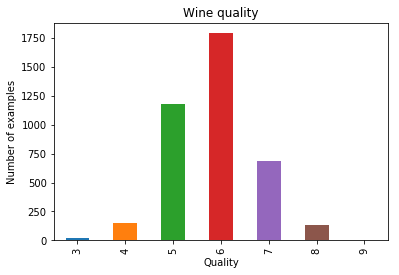

In [6]:
ax = df.quality.value_counts().sort_index().plot(kind='bar', title='Wine quality', x='Quality')
ax.set(xlabel="Quality", ylabel="Number of examples")

Classes are not represented equally, so it is a class imbalance problem.<br>
To solve this problem, we can use the regression approach, since the classes are ordered and the error between neighboring classes is not as critical as the error between distant classes.

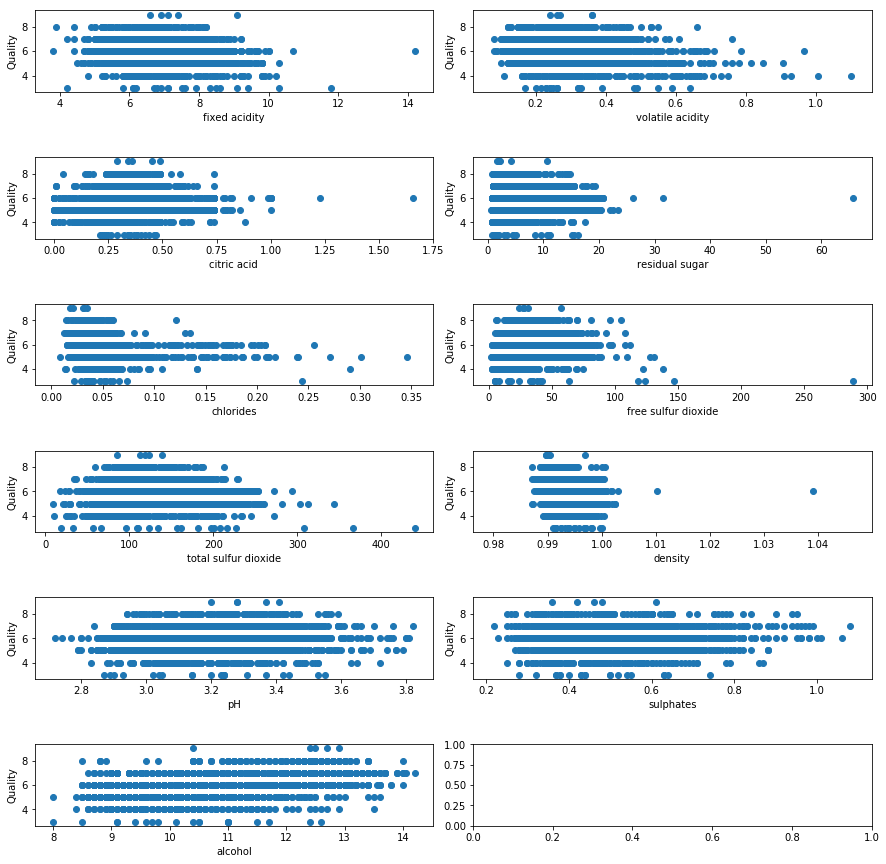

In [7]:
fig, axs = plt.subplots(6, 2, figsize=(15, 15))
fig.subplots_adjust(hspace = .8, wspace=.1)

axs = axs.ravel()

for i in range(len(df.columns) - 1):
    column_name = df.columns[i]
    axs[i].scatter(df[column_name].values, df['quality'].values)
    axs[i].set(xlabel=column_name, ylabel="Quality")

These graphs show that none of the features have a strong correlation with quality.<br>
There are a small number of outliers

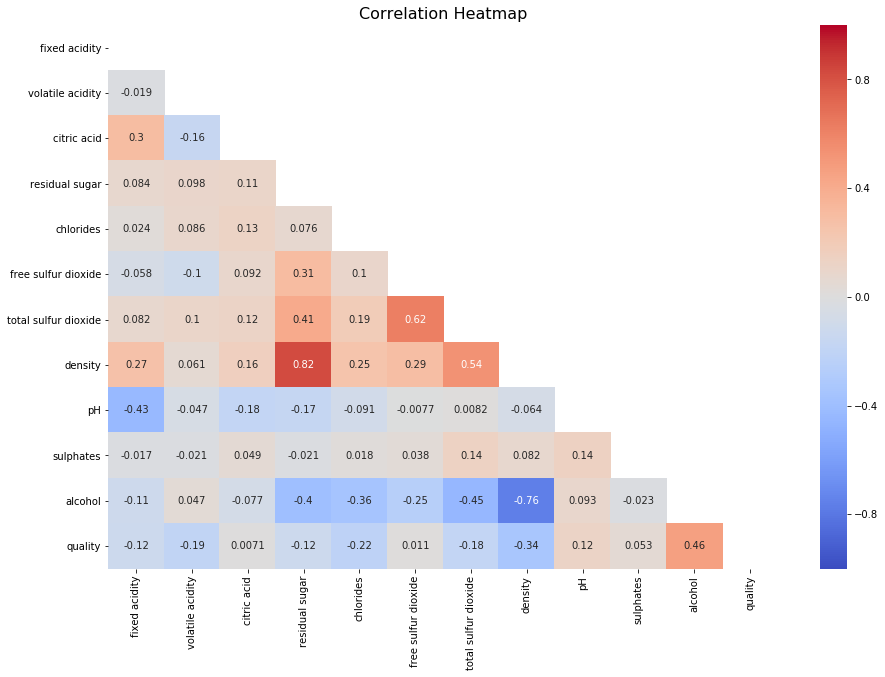

In [8]:
import seaborn as sns
plt.figure(figsize = (15,10))
plt.title('Correlation Heatmap', fontsize = 16);

# Mask to remove redundancy from the heatmap.
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True)

The correlation matrix shows that none of the features have a strong correlation with quality.<br>
There is high correlation between density and residual sugar and high negative correlation between density and alcohol.